In [1]:
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd
from config import password
import matplotlib.pyplot as plt

# Connect with database
connection = pg.connect(host='127.0.0.1', dbname = 'EmployeeSQL', user = 'postgres', password = password)

In [2]:
# Query and import employees table
employees = pd.read_sql_query('select * from employees',con=connection)
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [3]:
# Query and import salaries table
salaries = pd.read_sql_query('select * from salaries',con=connection)
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [4]:
# Query and import titles table
titles = pd.read_sql_query('select * from titles',con=connection)
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


# Create bins for salary ranges
bins = [0,49999,59999,69999,79999,89999,99999,109999,150000]
group_name = ["<50000","50000-59999","60000-69999","70000-79999","80000-89999","90000-99999",
              "100000-109999","> 110000"]

# Categorize the salary data using the bins. 
salaries["salary_range"] = pd.cut(salaries["salary"], bins, labels = group_name, )

salary_range = salaries.groupby(["salary_range"])
salary_count = salary_range.count()

salary_count

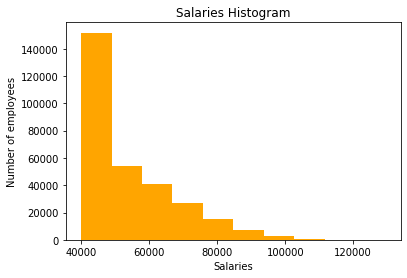

In [5]:
# Create a histogram to visualize the most common salary ranges for employees.
plt.hist(salaries["salary"], color = "orange")
plt.xlabel("Salaries")
plt.ylabel("Number of employees")
plt.title("Salaries Histogram")

plt.show()

#The most common salary range is 40000-50000 based on following graph

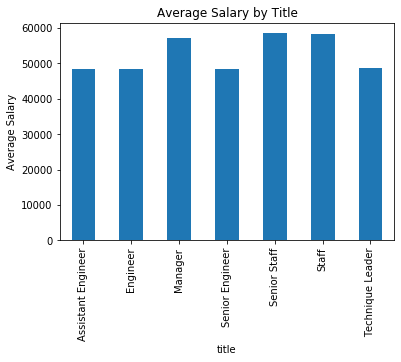

In [6]:
titles_salaries = pd.merge(titles, salaries, on = ("emp_no","from_date"), how = "inner")

title_group = titles_salaries.groupby(["title"])

avg_salary = title_group.mean()["salary"]

avg_salary.plot(kind = "bar")
plt.ylabel("Average Salary")
plt.title("Average Salary by Title")
plt.show()

In [7]:
employees.loc[employees["emp_no"] == 499942]

,emp_no,birth_date,first_name,last_name,gender,hire_date
299966,499942,1963-01-10,April,Foolsday,F,1997-02-10
